In [42]:
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2

In [43]:
# Requesting the raw JSON file 
competitions = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json')
competitions = competitions.json()

In [44]:
# parsing through the JSON file to find the data on the game we want
for competition in competitions:
  print(competition['competition_name'], competition['season_name'], competition['competition_id'], competition['season_id'])

1. Bundesliga 2015/2016 9 27
Champions League 2018/2019 16 4
Champions League 2017/2018 16 1
Champions League 2016/2017 16 2
Champions League 2015/2016 16 27
Champions League 2014/2015 16 26
Champions League 2013/2014 16 25
Champions League 2012/2013 16 24
Champions League 2011/2012 16 23
Champions League 2010/2011 16 22
Champions League 2009/2010 16 21
Champions League 2008/2009 16 41
Champions League 2006/2007 16 39
Champions League 2004/2005 16 37
Champions League 2003/2004 16 44
Champions League 1999/2000 16 76
Champions League 1972/1973 16 277
Champions League 1971/1972 16 71
Champions League 1970/1971 16 276
Copa del Rey 1983/1984 87 84
Copa del Rey 1982/1983 87 268
Copa del Rey 1977/1978 87 279
FA Women's Super League 2020/2021 37 90
FA Women's Super League 2019/2020 37 42
FA Women's Super League 2018/2019 37 4
FIFA U20 World Cup 1979 1470 274
FIFA World Cup 2022 43 106
FIFA World Cup 2018 43 3
FIFA World Cup 1990 43 55
FIFA World Cup 1986 43 54
FIFA World Cup 1974 43 51
FIFA Wo

In [45]:
#Looking for the game between Manchester City ane Leicester City in the 2015/2016 season
competition_id = 2
season_id = 27

In [46]:
# Requesting the data for the competition 
matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/'+str(competition_id)+'/'+str(season_id)+'.json')
matches = matches.json()

In [47]:
matches = json_normalize(matches, sep = "_")

In [48]:
#Searching for the specific game
matches = matches.loc[(matches['home_team_home_team_name'] == 'Manchester City') & (matches['away_team_away_team_name'] == 'Leicester City')]

In [49]:
#Print the details of the specific match 
matches

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
338,3754290,2016-02-06,13:45:00.000,1,3,available,processing,2021-07-26T18:29:21.038,2021-06-12T16:17:31.694,25,...,1,Regular Season,4715,Etihad Stadium,68,England,8,Anthony Taylor,68,England


In [50]:
# Match Id: 3754290 is the id for the game
match_id = 3754290
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/'+str(match_id)+'.json')
events = events.json()
events = json_normalize(events, sep = "_")

In [51]:
# Seperate all the events to filter out only for 'shooting' events
events_raw = events[events.type_name == 'Shot']
events_number_raw = events[['player_name', 'shot_end_location','shot_outcome_name', 'location','possession_team_name', 'shot_statsbomb_xg']]
shots = events_number_raw.dropna()
shots

,player_name,shot_end_location,shot_outcome_name,location,possession_team_name,shot_statsbomb_xg
89,Robert Huth,"[120.0, 41.4, 1.6]",Goal,"[113.1, 39.6]",Leicester City,0.136856
318,Jamie Vardy,"[112.7, 35.4, 0.9]",Saved,"[110.5, 34.7]",Leicester City,0.254670
465,Danny Drinkwater,"[117.6, 31.0, 0.0]",Saved,"[116.8, 28.4]",Leicester City,0.036671
469,Robert Huth,"[112.7, 37.0]",Wayward,"[107.3, 39.6]",Leicester City,0.107521
625,David Josué Jiménez Silva,"[120.0, 46.3, 0.0]",Off T,"[107.5, 31.9]",Manchester City,0.086795
910,Shinji Okazaki,"[120.0, 50.6, 0.0]",Off T,"[114.4, 35.6]",Leicester City,0.258522
952,Aleksandar Kolarov,"[114.7, 44.8]",Blocked,"[106.8, 62.8]",Manchester City,0.009466
1153,Gnégnéri Yaya Touré,"[120.0, 34.6, 4.9]",Off T,"[112.1, 28.3]",Manchester City,0.102942
1264,Sergio Leonel Agüero del Castillo,"[117.3, 43.1, 0.2]",Saved,"[106.5, 57.7]",Manchester City,0.027349
1333,Aleksandar Kolarov,"[120.0, 32.6, 6.5]",Off T,"[95.9, 20.3]",Manchester City,0.010467


In [52]:
# This is done to remove the 3 coordinate that would had calculated the height of the goal. 
# Since we are preparing a 2D map and not a 3D we do not need this value 
for i in shots['shot_end_location']:
    if len(i) == 3:
        i == i.pop()
    else: 
        continue

In [53]:
# Seperates the coordinates into 'x' and 'y' locations for where the shot ended 
shot_end_x = []
shot_end_y = []

for i in shots['shot_end_location']:
  shot_end_x.append(i[0])
  shot_end_y.append(i[1])

In [55]:
# Seperates the coordinates into 'x' and 'y' locations for where the shot started
location_x = []
location_y = []

for i in shots['location']:
  location_x.append(i[0])
  location_y.append(i[1]) 

In [56]:
# Appends the shots to the datafarme 
shots['shot_end_x'] = shot_end_x
shots['shot_end_y'] = shot_end_y
# Also extracts for where the shot occured 
shots['location_x'] = location_x
shots['location_y'] = location_y

C:\Users\maniz\AppData\Local\Temp\ipykernel_29716\3891446393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['shot_end_x'] = shot_end_x
C:\Users\maniz\AppData\Local\Temp\ipykernel_29716\3891446393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['shot_end_y'] = shot_end_y
C:\Users\maniz\AppData\Local\Temp\ipykernel_29716\3891446393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [57]:
# Seperate the coordinates for eah team
mancity = shots[shots['possession_team_name'] == 'Manchester City']
leicity = shots[shots['possession_team_name'] == 'Leicester City']

(-0.5, 5884.5, 942.5, -0.5)

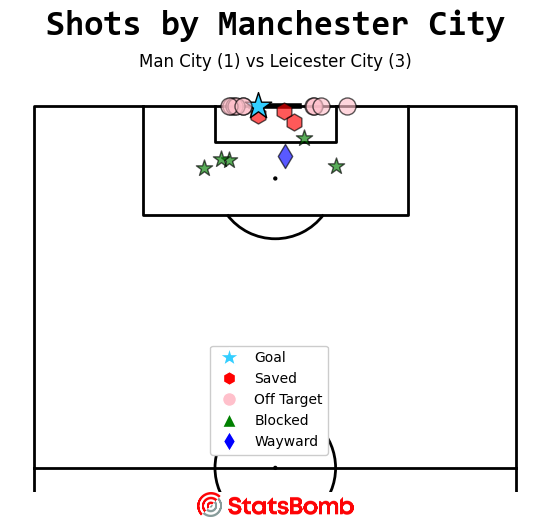

In [58]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import to_rgba

# Setting up the pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, pitch_color='white', line_color='black')
fig, axs = pitch.grid(figheight=5, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("white")

# Preparing the coordinates for each outcome of a shot
for i, row in mancity.iterrows():
   if row["shot_outcome_name"] == 'Goal':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 1, s = 400, color = "#33ceff", marker='*', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Saved':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "red", marker='h', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Off T':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "pink", marker='o', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Blocked':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "green", marker='*', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Wayward':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "blue", marker='d', ec='black', ax=axs['pitch'])
       
title_font = {'family': 'Consolas', 'size': 25, 'style': 'normal', 'weight': 'bold'}

# Setting up the title
axs['title'].text(0.5, 1.4, 'Shots by Manchester City', color='black',
                  va='center', ha='center', fontdict=title_font)
axs['title'].text(0.5, 0.5, 'Man City (1) vs Leicester City (3)', color='black',
                  va='center', ha='center', fontsize=12)

legend_elements = [
    Line2D([0], [0], marker='*', color="w", label='Goal', markerfacecolor="#33ceff", markersize=15),
    Line2D([0], [0], marker='h', color='w', label='Saved', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color="w", label='Off Target', markerfacecolor="pink", markersize=10),
    Line2D([0], [0], marker='^', color="w", label='Blocked', markerfacecolor="green", markersize=10),
    Line2D([0], [0], marker='d', color="w", label='Wayward', markerfacecolor="blue", markersize=10)
]

# Setting up the legend
legend=plt.legend(handles=legend_elements, loc=(.08,2.5))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(None)

img = cv2.imread('sb_logo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')



(-0.5, 5884.5, 942.5, -0.5)

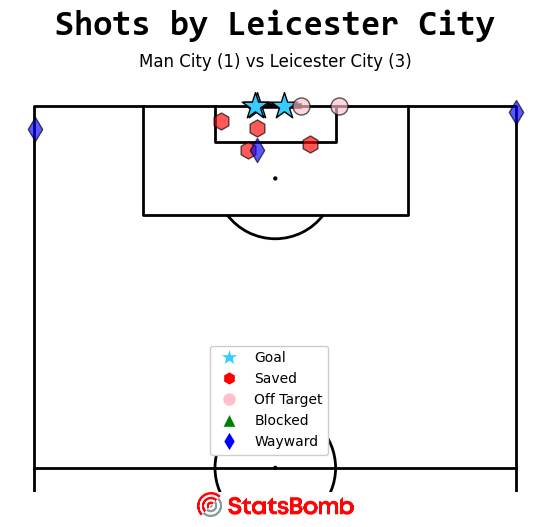

In [59]:
# Setting up the pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, pitch_color='white', line_color='black')
fig, axs = pitch.grid(figheight=5, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)
fig.set_facecolor("white")

# Preparing the coordinates for each outcome of a shot
for i, row in leicity.iterrows():
   if row["shot_outcome_name"] == 'Goal':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 1, s = 400, color = "#33ceff", marker='*', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Saved':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "red", marker='h', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Off T':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "pink", marker='o', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Blocked':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "green", marker='*', ec='black', ax=axs['pitch'])
   elif row["shot_outcome_name"] == 'Wayward':
       pitch.scatter(row.shot_end_x, row.shot_end_y, alpha = 0.65, s = 150, color = "blue", marker='d', ec='black', ax=axs['pitch'])

title_font = {'family': 'Consolas', 'size': 25, 'style': 'normal', 'weight': 'bold'}

# Setting up the title
axs['title'].text(0.5, 1.4, 'Shots by Leicester City', color='black',
                  va='center', ha='center', fontdict=title_font)       
axs['title'].text(0.5, 0.5, 'Man City (1) vs Leicester City (3)', color='black',
                  va='center', ha='center', fontsize=12)   

# Setting up the legend
legend_elements = [
    Line2D([0], [0], marker='*', color="w", label='Goal', markerfacecolor="#33ceff", markersize=15),
    Line2D([0], [0], marker='h', color='w', label='Saved', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color="w", label='Off Target', markerfacecolor="pink", markersize=10),
    Line2D([0], [0], marker='^', color="w", label='Blocked', markerfacecolor="green", markersize=10),
    Line2D([0], [0], marker='d', color="w", label='Wayward', markerfacecolor="blue", markersize=10)
]


legend=plt.legend(handles=legend_elements, loc=(.08,2.5))
legend.get_frame().set_facecolor('white')

legend.get_frame().set_alpha(None)

img = cv2.imread('sb_logo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

